# Decision Trees

Wir wollen herausfinden, welches Modell sich am besten eignet, um Vorhersagen treffen zu können, welche Netflixfilme gut performen werden und erfolgreich werden.

## Datenupload und Vorbereitung

In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv('/content/Daten_kodiert_fuer_modelle_dummycodierung_V6.csv')

In [39]:

df


,character,description,runtime,imdb_votes,title,animation,comedy,crime,documentation,drama,...,Adil_Hussain,Nobunaga_Shimazaki,Manisha_Koirala,Ashleigh_Ball,Aoi_Yuki,Koji_Yusa,Tomokazu_Sugita,Graham_Chapman,Other_actors,target_variable
0,"Oh Joon-woo, Kim Yoo-bin, Sang-chul, Elena Kim...","As a grisly virus rampages a city, a lone man ...",98.0,38313.0,#Alive,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6.550
1,"Narrator, Self, Self, Self",One single Anne Frank moves us more than the c...,92.0,1548.0,#AnneFrank. Parallel Stories,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,6.650
2,"Ditto, Ayu, Darma, Mili, Dila, Rifnu, Aca, Iqb...","Pining for his high school crush for years, a ...",102.0,714.0,#FriendButMarried,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6.775
3,"Ditto, Ayu, Ayu's Mother, Ditto's Mother, Ditt...",As Ayu and Ditto finally transition from best ...,104.0,311.0,#FriendButMarried 2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,7.050
4,"Dani Barnes, Cameron Drake, Alexa Medina, Fred...",When nerdy high schooler Dani finally attracts...,99.0,6357.0,#realityhigh,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,5.425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,"Doujima Daisuke (voice), Milo (voice), Chang L...",An isolated city. An unknown enemy. An uncerta...,23.0,612.0,revisions,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,6.175
3946,"Jonathan Larson, Susan Wilson, Michael, Karess...","On the cusp of his 30th birthday, Jonathon Lar...",121.0,98370.0,"tick, tick... BOOM!",0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,7.575
3947,"Segundo, María, Rossi de la Vega, Carla, Pili,...","When her estranged mother suddenly dies, a wom...",81.0,404.0,"¡Ay, mi madre!",0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,4.000
3948,"Titi, Peju, Emeka, Beauty, Tony, Sheriff, Simo...","In Lagos, Nigeria, young, naive Nigerian journ...",106.0,791.0,Òlòtūré,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,5.675


In [40]:
df.dtypes

character           object
description         object
runtime            float64
imdb_votes         float64
title               object
                    ...   
Koji_Yusa            int64
Tomokazu_Sugita      int64
Graham_Chapman       int64
Other_actors         int64
target_variable    float64
Length: 160, dtype: object

In [41]:
#Überprüfen, ob die Bereinigung erfolgreich war und der Datensatz komplett ist
df.isna().sum()

character          0
description        0
runtime            0
imdb_votes         0
title              0
                  ..
Koji_Yusa          0
Tomokazu_Sugita    0
Graham_Chapman     0
Other_actors       0
target_variable    0
Length: 160, dtype: int64

In [42]:
df.describe()

,runtime,imdb_votes,animation,comedy,crime,documentation,drama,family,fantasy,history,...,Adil_Hussain,Nobunaga_Shimazaki,Manisha_Koirala,Ashleigh_Ball,Aoi_Yuki,Koji_Yusa,Tomokazu_Sugita,Graham_Chapman,Other_actors,target_variable
count,3950.000000,3.950000e+03,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,...,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000
mean,78.811550,1.759300e+04,0.042532,0.242025,0.041519,0.095443,0.259747,0.018734,0.016709,0.003038,...,0.002278,0.002278,0.002278,0.002025,0.002278,0.002278,0.002278,0.002278,0.993165,6.643387
std,38.376909,6.753915e+04,0.201824,0.428364,0.199513,0.293863,0.438551,0.135602,0.128195,0.055041,...,0.047685,0.047685,0.047685,0.044964,0.047685,0.047685,0.047685,0.047685,0.082404,1.030570
min,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,46.000000,7.430000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
50%,84.000000,2.713500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000
75%,105.000000,9.829750e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.375000
max,225.000000,2.021343e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.325000


## Model Training & Evaluation

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Bevor wir mit dem Training des Decision-Tree-Modells starten, müssen wir entscheiden, welche Spalten wir als Merkmale und welche wir als Zielvariable heranziehen.

Wir wollen alle Spalten verwenden, außer die zuvor definierte target_variable, diese soll als unsere Zielvariable definiert werden.

Dann teilen wir die Daten in eine Test- und Trainingsgruppe auf. Wir teilen diese zu 80/20 auf und verwenden eine stratifizierte Aufteilung. Das bedeutet, dass die Klassenverteilung in der Trainings- und Testgruppe ungefähr gleich ist.
Die Aufteilung in Training und Test ist wichtig, da wir unsere Modelle immer anhand von Daten bewerten wollen, die sie während des Trainings nicht gesehen haben, da dies die Ergebnisse verfälschen könnte.



In [44]:
X = df.drop(columns=['target_variable', 'title', 'description', 'character'])

y = df['target_variable']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training des Decision-Tree Modells


Nachdem der Datensatz fertig vorbereitet ist, kann mit dem dem Training des Modells gestartet werden.

In [45]:
tree = DecisionTreeRegressor(random_state=42)

Entscheidungsbäume können problemlos mit Merkmalen mit unterschiedlichen Bereichen umgehen. Daher verwenden wir für das Training von Entscheidungsbäumen nicht die skalierte Version. Außerdem erleichtert die Verwendung der unskalierten Version die Interpretation erheblich.

In [46]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(tree, X_test, y_test):
  pred = tree.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))

In [48]:
pred = tree.predict(X_test)

In [49]:
evaluate(tree, X_test, y_test)

R2: -0.05546976419104355
MAE: 0.8209585152495524
MSE: 1.1910181766942847
RMSE: 1.0913377922047256
MAPE: 0.1327268037038091


Das Modell performt nicht gut, vielleicht kann durch Hyperparameter Tuning eine Verbesserung erzielt werden.

Man kann das Trainierte Modell ganz leicht plotten:

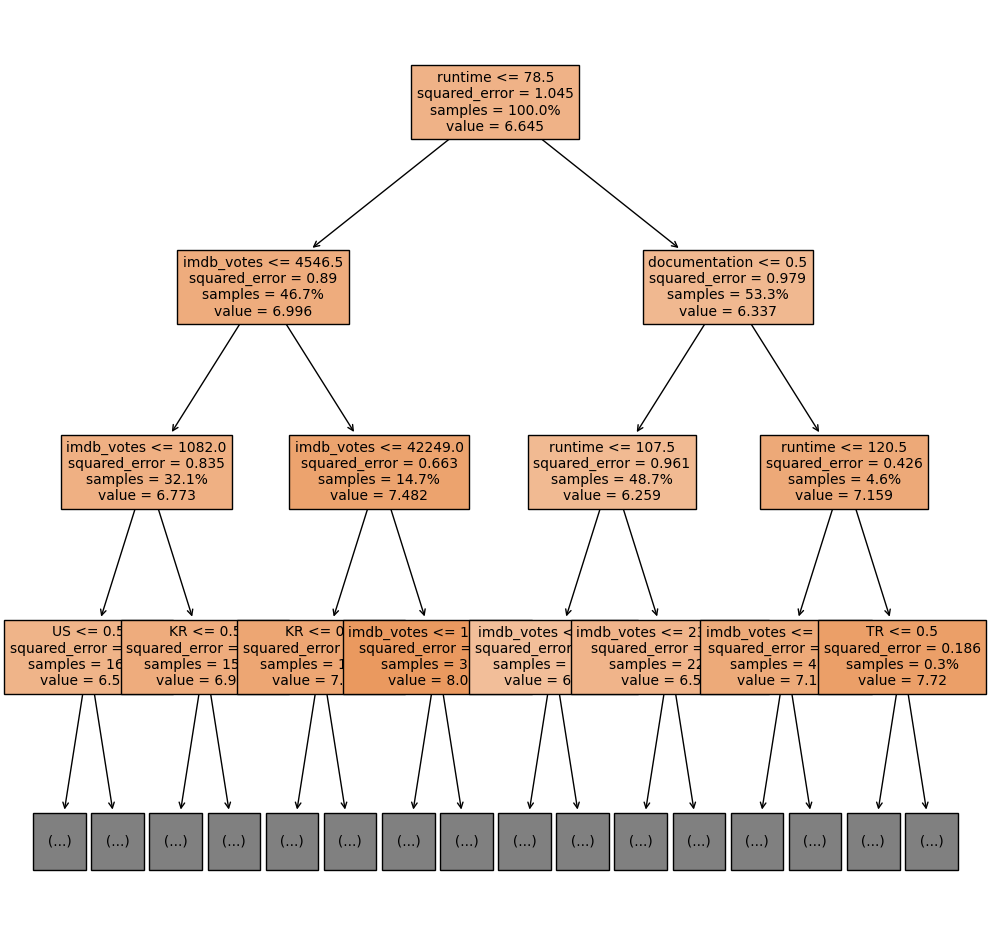

In [50]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12)) # increase figure size

sktree.plot_tree(tree, max_depth=3, fontsize=10, feature_names=X.columns, proportion=True, filled=True);

Man sieht, dass das wichtigste Attribut die "runtime" zu sein scheint.
Das Attribut stellt somit in unserem Baum die Wurzel dar.
Wenn dieser Wert kleiner als 78,5 ist, scheinen die "imdb_votes" eine wichtige Rolle zu spielen, damit ein hohes Rating bei den imdb_scores erzielt wird. Filme mit dem Genres "Dokumentation" (<0,5) scheinen auch den Erfolg von Filmen positiv zu beeinflussen.

Man kann den Baum weiter hinsichtlich seiner Qualität interpretieren, indem wir die Vorhersagen gegen die tatsächlichen Daten vergleichen.

Dazu müssen wir die Ergebnisse in zwei Dimensionen darstellen und eine unabhängige Variable und eine abhängige Variable bestimmen. Da das wichtigste Merkmal die "runtime" ist, ziehen wir dieses Attribut heran.

Wir kombinieren zunächst, die Vorhersagen mit den Zielvariable in einem Dataframe:

In [51]:
predictions = tree.predict(X_test)
df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

Wir müssen zudem den Dataframe nach der unabhängigen Variable in aufsteigender Reihenfolge sortieren, da die gezeichnete Linie sonst überall hin springen würde.

In [52]:
df_with_predictions = df_with_predictions.sort_values(by='runtime')

Danach können wir den Plot erstellen:

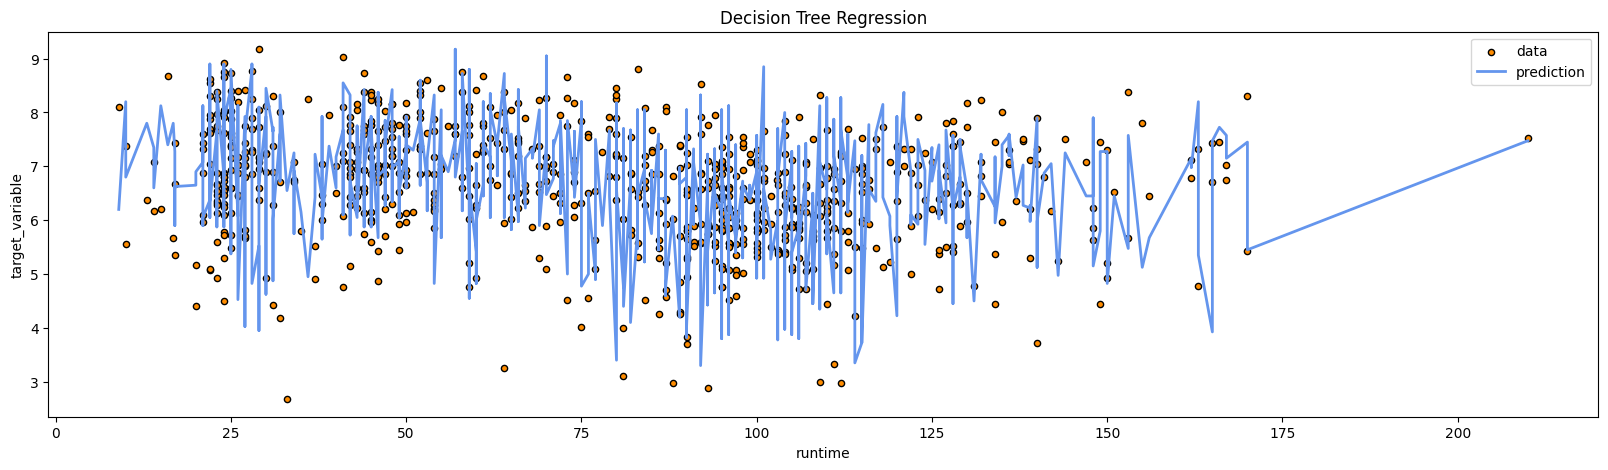

In [53]:
ax = df_with_predictions.plot(x='runtime', y='target_variable', kind='scatter', s=20, edgecolor='black',
            c='darkorange', label='data', figsize=(20,5))

df_with_predictions.plot(x='runtime', y='Prediction', kind='line', color='cornflowerblue',
         label='prediction', linewidth=2, ax=ax)

ax.set_xlabel('runtime')
ax.set_ylabel('target_variable')
ax.set_title('Decision Tree Regression')
ax.legend()

In der Visualisierung werden die tatsächlichen Daten als rote Punkte dargestellt. Die blauen Linien hingegen stellen die Vorhersagen des Modells dar.
Es ist zu erkennen, dass der Baum in einigen Bereichen zu gut passt (sich die Daten merkt), so dass die Durchführung von Beschneidungstechniken von Vorteil sein könnte.

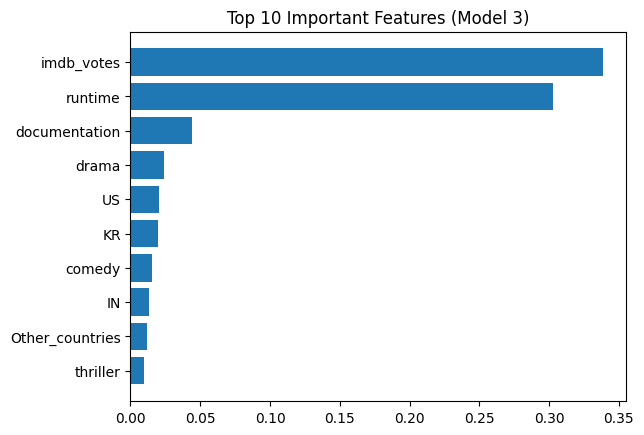

In [54]:
#Wir schauen uns an welche Feature in unserem Modell am wichtigsten sind:

feature_importance = tree.feature_importances_
sorted_idx = np.argsort(feature_importance)
top_10 = 10
pos = np.arange(top_10)
plt.barh(pos, feature_importance[sorted_idx][-top_10:], align='center')

plt.yticks(pos, np.array(X.columns)[sorted_idx][-top_10:])
plt.title('Top 10 Important Features (Model 3)')
plt.show()

Die runtime, imdb votes und die documentation sind die wichtigsten Feature zur Vorhersage unserer taget variable

#Hyperparameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
parameter_grid = {'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                  'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750],
                  'max_depth': [2, 3, 4, 5, 6, 7]}

In [57]:
tree = DecisionTreeRegressor()
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

 # Das Parameterraster definieren:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.8],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error'],
    'max_leaf_nodes': [None, 10, 100, 1000],
    'min_impurity_decrease': [0.0, 0.1, 0.5, 1.0]
}



In [58]:
# Stellt sicher, dass alle nötigen CPU-Kerne genutzt werden
optimized_tree = RandomizedSearchCV(tree, param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', error_score='raise')
optimized_tree.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

RandomizedSearchCV(cv=5, error_score='raise', estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'absolute_error',
                                                      'squared_error'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         0.5, 0.8],
                                        'max_leaf_nodes': [None, 10, 100, 1000],
                                        'min_impurity_decrease': [0.0, 0.1, 0.5,
                                                                  1.0],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20]},
                   scoring='neg_mean_squared_error')

In [59]:
#Jetzt können die besten Parameter bestimmt werden:
optimized_tree.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 3,
 'min_impurity_decrease': 0.5,
 'max_leaf_nodes': 100,
 'max_features': 0.8,
 'max_depth': 10,
 'criterion': 'friedman_mse'}

In [60]:
evaluate(optimized_tree, X_test, y_test)

R2: 0.27113375980955257
MAE: 0.6861169045645643
MSE: 0.8224706854686531
RMSE: 0.906901695592556
MAPE: 0.11449589890266419


In [61]:
best_tree = optimized_tree.best_estimator_

Unser Modell konnte mit Hyperparamter Tuning verbessert werden.

#Error Analysis

Um zu sehen, in welchen Bereichen das Modell gut abschneidet und wo nicht können wir eine Konfusionsmatrix erstellen, die zeigt, welche Klassen das Modell zuverlässig vorhersagt und wo es Probleme hat.

Wir prüfen das Model auf Overfitting (Overfitting tritt auf, wenn die Trainingsgenauigkeit viel höher ist als die Testgenauigkeit. Wenn dies der Fall ist, bedeutet dies, dass der Entscheidungsbaum zu stark an die Trainingsdaten angepasst wurde und nicht in der Lage ist, auf neuen Daten gut zu generalisieren.

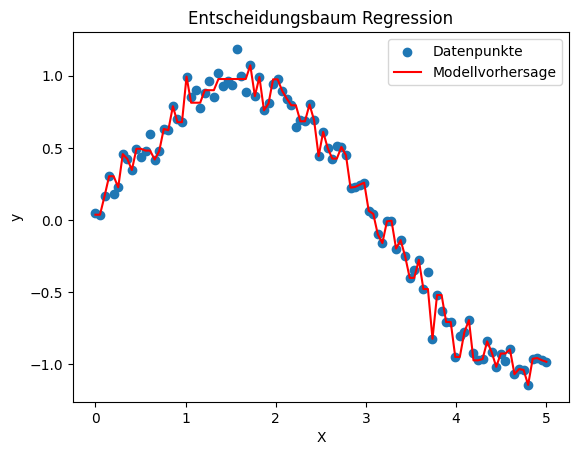

Trainingsgenauigkeit: 0.9996478735325818
Testgenauigkeit: 0.9818577390792794


In [62]:
# Generieren von zufälligen Daten
np.random.seed(42)
X = np.linspace(0, 5, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, size=(100, 1))

# Aufteilen der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trainieren eines Entscheidungsbaums
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)

# Auswerten der Performance auf den Trainings- und Testdaten
train_score = tree.score(X_train, y_train)
test_score = tree.score(X_test, y_test)

# Erstellen eines Plots mit den Datenpunkten und der Modellvorhersage
plt.scatter(X, y, label='Datenpunkte')
plt.plot(X, tree.predict(X), color='red', label='Modellvorhersage')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Entscheidungsbaum Regression')
plt.legend()
plt.show()

print('Trainingsgenauigkeit:', train_score)
print('Testgenauigkeit:', test_score)

Die Trainingsgenauigkeit ist minimal höher als die Testgenauigkeit.

In [63]:

from sklearn.metrics import mean_squared_error


# Aufteilen der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen des Entscheidungsbaum-Regressionsmodells
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Vorhersage auf den Trainingsdaten

y_train_pred = model.predict(X_train)
# Berechnung der Devianz der Trainingsdaten
deviance_train = mean_squared_error(y_train, y_train_pred)

# Vorhersage auf den Testdaten
y_test_pred = model.predict(X_test)
# Berechnung der Devianz der Testdaten
deviance_test = mean_squared_error(y_test, y_test_pred)

print("Devianz der Trainingsdaten:", deviance_train)
print("Devianz der Testdaten:", deviance_test)

Devianz der Trainingsdaten: 0.0
Devianz der Testdaten: 0.009086082816864727


Die Devianz gibt an, wie gut das Modell die Daten vorhersagt, wobei ein niedrigerer Wert eine bessere Vorhersageleistung bedeutet.



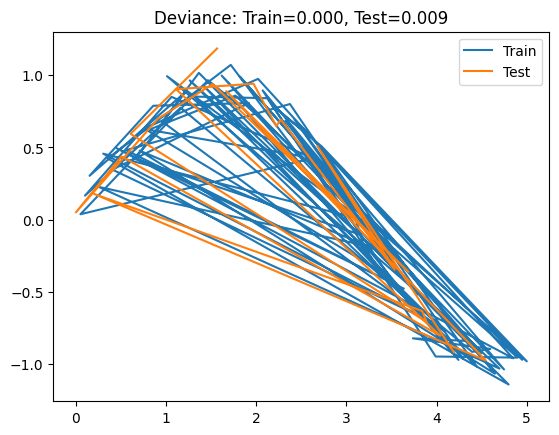

In [64]:
plt.figure()
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.legend()
plt.title(f'Deviance: Train={deviance_train:.3f}, Test={deviance_test:.3f}')
plt.show()

In [65]:
df_with_predictions['pred_diff'] = np.abs(df_with_predictions['target_variable'] - df_with_predictions.Prediction)

<Axes: ylabel='Frequency'>

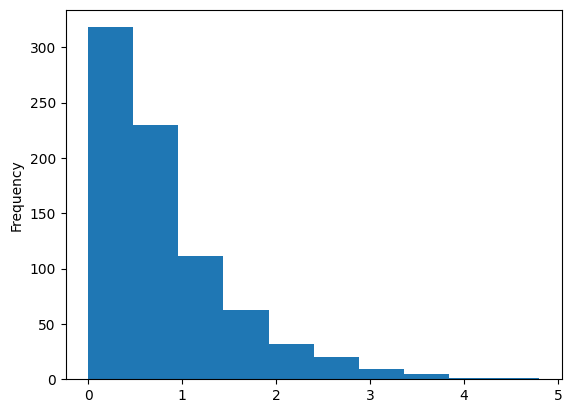

In [66]:
df_with_predictions.pred_diff.plot(kind='hist')